In [10]:
import pandas as pd
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
df = pd.read_csv('SPY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.299288,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500


In [7]:
residuals = df['Adj Close'].pct_change() - df['Adj Close'].pct_change().mean()
residuals = residuals.dropna()
durbin_watson(residuals)

2.17913275703075

In [8]:
# from scratch
((residuals - residuals.shift())**2).sum()/(residuals**2).sum()

2.17913275703075

Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.

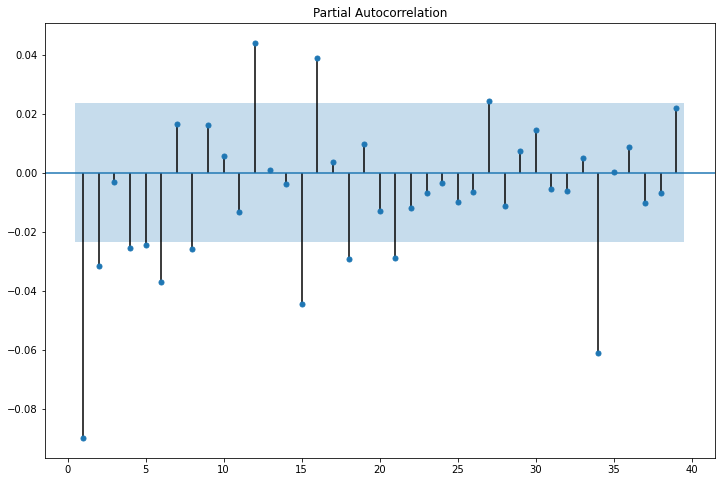

In [15]:
plot = plot_pacf(residuals, zero=False)
plot.set_size_inches(12,8)
# several small but significant negative correlations with lags, so Durbin Watson stat slightly above 2 makes sense